##### Dataset

In [1]:
# Data: SMSSpamCollection
# Location: https://mitu.co.in/dataset
import os
os.getcwd()

'/home/mitu/dc-nlp-mar24'

##### Import the libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

##### Read the data

In [3]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','text'])

In [4]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.shape

(5572, 2)

In [6]:
df.columns

Index(['label', 'text'], dtype='object')

##### Separate the input and output data

In [7]:
x = df['text']
y = df['label']

In [9]:
y.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
import matplotlib.pyplot as plt

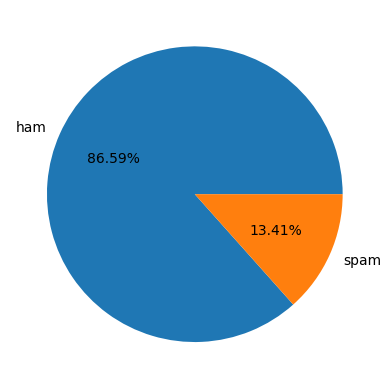

In [11]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

In [12]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

##### Data Preparation

In [13]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [14]:
sent = 'Hello friends! How are you? I like Python Programming language.'

In [15]:
# Tokenization
tokens1 = word_tokenize(sent)

In [16]:
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming',
 'language',
 '.']

In [17]:
# Remove the punctuations
tokens2 = [token for token in tokens1 if token.isalpha()]

In [18]:
tokens2

['Hello',
 'friends',
 'How',
 'are',
 'you',
 'I',
 'like',
 'Python',
 'Programming',
 'language']

In [19]:
swords = stopwords.words('english')

In [20]:
# Remove the stopwords
tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]

In [21]:
tokens3

['hello', 'friends', 'like', 'python', 'programming', 'language']

In [22]:
ps = PorterStemmer()

In [23]:
# Remove the affixes from the keywords
tokens4 = [ps.stem(token) for token in tokens3]

In [24]:
tokens4

['hello', 'friend', 'like', 'python', 'program', 'languag']

In [26]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
    tokens4 = [ps.stem(token) for token in tokens3]
    return tokens4

In [27]:
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program', 'languag']

In [28]:
x.apply(lambda a : clean_text(a))

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, contact, u, pound, prize, claim, e...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

##### TF*IDF Vectorizer

In [30]:
sent1 = 'It was a beautiful and awesome day for me.'
sent2 = 'How can we do it so it looks awesome for everyone.'

In [32]:
# import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
# create the object
tfidf = TfidfVectorizer(analyzer=clean_text)

In [34]:
new_text = tfidf.fit_transform([sent1.lower(), sent2.lower()])

In [35]:
new_text

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [36]:
tfidf.get_feature_names_out()

array(['awesom', 'beauti', 'day', 'everyon', 'look'], dtype=object)

In [39]:
newdf = pd.DataFrame(data=new_text.toarray(), 
                     columns=tfidf.get_feature_names_out())

In [40]:
newdf

,awesom,beauti,day,everyon,look
0,0.449436,0.631667,0.631667,0.000000,0.000000
1,0.449436,0.000000,0.000000,0.631667,0.631667


In [41]:
x.shape

(5572,)

In [42]:
# create the object
tfidf = TfidfVectorizer(analyzer=clean_text)

In [43]:
x_new = tfidf.fit_transform(x)

In [44]:
x_new.shape

(5572, 5925)

In [45]:
tfidf.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'zyada', 'é', 'ü'], dtype=object)

In [46]:
len(tfidf.get_feature_names_out())

5925

##### Cross-validation

In [49]:
x_new.shape

(5572, 5925)

In [50]:
y.shape

(5572,)

In [51]:
# import the function
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0)

In [53]:
x_train.shape

(4179, 5925)

In [55]:
x_test.shape

(1393, 5925)

##### Build the Machine Learning Model

In [58]:
# import the class
from sklearn.ensemble import RandomForestClassifier

In [59]:
# create the object
classifier = RandomForestClassifier(random_state=0)

In [60]:
# train the algorithm
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

##### Performance Evaluation

In [66]:
y_pred = classifier.predict(x_test)

In [67]:
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [68]:
# predicted by algorithm
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [69]:
# actual message type
y_test

4456     ham
690     spam
944      ham
3768     ham
1189     ham
        ... 
1889     ham
2250    spam
2915    spam
1282     ham
1206     ham
Name: label, Length: 1393, dtype: object

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

97.77458722182341

In [71]:
# sample.csv
# Location: https://mitu.co.in/dataset

In [73]:
new = pd.read_csv('sample.csv', sep='\t', names = ['text'])

In [74]:
new

,text
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [77]:
classifier.predict(tfidf.transform(new['text']))

array(['ham', 'spam', 'ham'], dtype=object)